# Predictive-Analysis-of-Startup-Acquisition-Status

## Introduction
 Study the funding analysis of startuo companies and their present financial state.

In [1]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
import datetime

sns.set()
warnings.filterwarnings('ignore')

In [2]:
data = pd.read_csv("companies.csv")
data.head()

,id,Unnamed: 0.1,entity_type,entity_id,parent_id,name,normalized_name,permalink,category_code,status,...,first_milestone_at,last_milestone_at,milestones,relationships,created_by,created_at,updated_at,lat,lng,ROI
0,c:1,0,Company,1,NaN,Wetpaint,wetpaint,/company/wetpaint,web,operating,...,2010-09-05,2013-09-18,5.0,17.0,initial-importer,2007-05-25 06:51:27,2013-04-13 03:29:00,47.606209,-122.332071,15.5
1,c:10,1,Company,10,NaN,Flektor,flektor,/company/flektor,games_video,acquired,...,NaN,NaN,NaN,6.0,initial-importer,2007-05-31 21:11:51,2008-05-23 23:23:14,34.021122,-118.396467,NaN
2,c:100,2,Company,100,NaN,There,there,/company/there,games_video,acquired,...,2003-02-01,2011-09-23,4.0,12.0,initial-importer,2007-08-06 23:52:45,2013-11-04 02:09:48,37.562992,-122.325525,NaN
3,c:10000,3,Company,10000,NaN,MYWEBBO,mywebbo,/company/mywebbo,network_hosting,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 16:51:57,2008-09-06 14:19:18,NaN,NaN,NaN
4,c:10001,4,Company,10001,NaN,THE Movie Streamer,the movie streamer,/company/the-movie-streamer,games_video,operating,...,NaN,NaN,NaN,NaN,NaN,2008-08-24 17:10:34,2008-09-06 14:19:18,NaN,NaN,NaN


In [3]:
data.describe()

,Unnamed: 0.1,entity_id,parent_id,logo_width,logo_height,investment_rounds,invested_companies,funding_rounds,funding_total_usd,milestones,relationships,lat,lng,ROI
count,196553.000000,196553.000000,0.0,110110.000000,110110.000000,2591.000000,2591.000000,31707.000000,2.787400e+04,91699.000000,129667.000000,83852.000000,83852.000000,726.000000
mean,98276.000000,153006.227333,NaN,459.132685,222.728917,2.372057,2.204940,1.659760,1.481652e+07,1.199402,2.852067,37.564512,-52.123066,45.745037
std,56740.108067,90209.250941,NaN,594.982577,333.090722,12.173510,11.436955,1.201666,6.775937e+07,0.540099,9.100309,15.477102,70.049067,572.035638
min,0.000000,1.000000,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,2.910000e+02,1.000000,1.000000,-50.942326,-159.497746,0.011111
25%,49138.000000,59850.000000,NaN,192.000000,70.000000,1.000000,1.000000,1.000000,5.000000e+05,1.000000,1.000000,34.052234,-111.940005,2.648879
50%,98276.000000,174539.000000,NaN,267.000000,105.000000,1.000000,1.000000,1.000000,2.564500e+06,1.000000,1.000000,39.768403,-77.036871,6.500497
75%,147414.000000,232655.000000,NaN,484.000000,232.000000,1.000000,1.000000,2.000000,1.100000e+07,1.000000,3.000000,45.421530,-0.127758,13.549900
max,196552.000000,286215.000000,NaN,18200.000000,9600.000000,478.000000,459.000000,15.000000,5.700000e+09,9.000000,1189.000000,77.553604,176.212549,13333.333333


In [4]:
data.shape

(196553, 44)

In [5]:
data.columns

Index(['id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'name',
       'normalized_name', 'permalink', 'category_code', 'status', 'founded_at',
       'closed_at', 'domain', 'homepage_url', 'twitter_username', 'logo_url',
       'logo_width', 'logo_height', 'short_description', 'description',
       'overview', 'tag_list', 'country_code', 'state_code', 'city', 'region',
       'first_investment_at', 'last_investment_at', 'investment_rounds',
       'invested_companies', 'first_funding_at', 'last_funding_at',
       'funding_rounds', 'funding_total_usd', 'first_milestone_at',
       'last_milestone_at', 'milestones', 'relationships', 'created_by',
       'created_at', 'updated_at', 'lat', 'lng', 'ROI'],
      dtype='object')

## A. Data Cleaning
    1. Delete irrelevant & redundant information
    2. Remove noise or unreliable data (missing values and outliers)
    
### 1. Delete irrelevant and redundant information
     a. Delete 'region','city','state_code' as they provide too much of granularity.
     b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by',
       'created_at', 'updated_at' as they are redundant.
     c. Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',           
        'short_description', 'description', 'overview','tag_list', 'name', 'normalized_name', 'permalink',    
        'invested_companies' as they are irrelevant features.
     d. Delete duplicate values if any.
     e. Delete those which has more than 98% of null values.
     
### 2. Remove noise or unreliable data (missing values and outliers)
     a. Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.
     b. Delete outliers for 'funding_total_usd' and 'funding_rounds'.
     c. Delete contradictory (mutually opposed or inconsistent data).

#### 1.a. Delete 'region','city' as they provide too much of granularity.    

In [6]:
del data['region']
del data['city']
del data['state_code']

In [7]:
data.shape

(196553, 41)

#### 1.b. Delete 'id', 'Unnamed: 0.1', 'entity_type', 'entity_id', 'parent_id', 'created_by', 'created_at', 'updated_at' as they are redundant.

In [8]:
del data['id']
del data['Unnamed: 0.1']
del data['entity_id']
del data['parent_id']
del data['created_by']
del data['created_at']
del data['updated_at']
del data['entity_type']

#### 1.c. Delete 'domain', 'homepage_url', 'twitter_username', 'logo_url', 'logo_width', 'logo_height',  'short_description',    'description',  'overview','tag_list', 'name', 'normalized_name', 'permalink', 'invested_companies' as they are irrelevant features.

In [9]:
del data['domain'] 
del data['homepage_url']
del data['twitter_username'] 
del data['logo_width']
del data['logo_url']
del data['logo_height']
del data['short_description']
del data['description']
del data['overview']
del data['tag_list']
del data['name']
del data['normalized_name']
del data['permalink']
del data['invested_companies']

In [10]:
data.shape

(196553, 19)

#### 1.d. Delete duplicate values if found any.

In [11]:
data.nunique()

category_code            42
status                    4
founded_at             6156
closed_at               925
country_code            175
first_investment_at    1197
last_investment_at     1105
investment_rounds        41
first_funding_at       3208
last_funding_at        2978
funding_rounds           15
funding_total_usd      9720
first_milestone_at     4080
last_milestone_at      3966
milestones                9
relationships           155
lat                    7962
lng                    7954
ROI                     657
dtype: int64

In [12]:
data.duplicated().sum()

87089

In [13]:
# Delete duplicate values if found any.
drop_dupe = data.drop_duplicates()
drop_dupe

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng,ROI
0,web,operating,2005-10-17,NaN,USA,NaN,NaN,NaN,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071,15.5
1,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.0,34.021122,-118.396467,NaN
2,games_video,acquired,NaN,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003-02-01,2011-09-23,4.0,12.0,37.562992,-122.325525,NaN
3,network_hosting,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,games_video,operating,2008-07-26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007-01-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013-08-12,2013-08-12,2.0,5.0,37.774929,-122.419415,NaN
196549,public_relations,operating,2007-11-01,NaN,USA,NaN,NaN,NaN,2008-08-25,2008-08-25,1.0,750000.0,2013-05-01,2013-05-01,1.0,14.0,37.338208,-121.886329,NaN
196550,consulting,operating,1959-01-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2012-01-01,2013-10-30,3.0,44.0,38.882334,-77.171091,NaN
196551,search,operating,2008-07-01,NaN,USA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,34.052234,-118.243685,NaN


In [14]:
# check if any left
drop_dupe.duplicated().sum()

0

#### 1.e. Delete those which has more than 98% of null values.

In [15]:
drop_dupe.isnull().sum().sort_values(ascending=False)

ROI                    108738
first_investment_at    107217
last_investment_at     107217
investment_rounds      107213
closed_at              106845
funding_total_usd       81602
first_funding_at        77992
last_funding_at         77992
funding_rounds          77793
first_milestone_at      53353
last_milestone_at       53353
milestones              53353
relationships           34403
lat                     28363
lng                     28363
founded_at              26913
country_code            24870
category_code           12230
status                      0
dtype: int64

In [16]:
(drop_dupe.isnull().sum()/drop_dupe.shape[0]*100).sort_values(ascending=False)

ROI                    99.336768
first_investment_at    97.947270
last_investment_at     97.947270
investment_rounds      97.943616
closed_at              97.607433
funding_total_usd      74.546883
first_funding_at       71.248995
last_funding_at        71.248995
funding_rounds         71.067200
first_milestone_at     48.740225
last_milestone_at      48.740225
milestones             48.740225
relationships          31.428598
lat                    25.910802
lng                    25.910802
founded_at             24.586165
country_code           22.719798
category_code          11.172623
status                  0.000000
dtype: float64

In [17]:
#  Since we can see only nan values so et's check how much of roi has nan values & it has more than 96% of null values, 
    # it would not make sense to impute these data. So, lets drop it.
del drop_dupe['ROI']


In [18]:
drop_dupe.shape

(109464, 18)

In [19]:
# # Since we can see it has more than 96% of null values, it would not make sense to impute these data. So, lets drop it.
#Type your code here!

#### 2.a. Delete instances with missing values for 'status', 'country_code', 'category_code' and 'founded_at'.
    (Since these are the type of data where adding value via imputation will create wrong pattern only)

In [20]:
drop_dupe.fillna(method='bfill', axis=0, inplace=True)

In [21]:
#Type your code here!

In [22]:
# Since we can see only nan values so et's check how much of rows has nan values.
drop_dupe.isnull().sum()

category_code           0
status                  0
founded_at              0
closed_at              11
country_code            0
first_investment_at    33
last_investment_at     33
investment_rounds      33
first_funding_at        0
last_funding_at         0
funding_rounds          0
funding_total_usd       0
first_milestone_at      0
last_milestone_at       0
milestones              0
relationships           0
lat                     0
lng                     0
dtype: int64

In [23]:
drop_dupe.head()

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
0,web,operating,2005-10-17,2010-01-01,USA,2012-12-27,2013-09-24,1.0,2005-10-01,2008-05-19,3.0,39750000.0,2010-09-05,2013-09-18,5.0,17.0,47.606209,-122.332071
1,games_video,acquired,2008-07-26,2010-01-01,USA,2012-12-27,2013-09-24,1.0,2008-02-26,2008-02-26,1.0,5000000.0,2003-02-01,2011-09-23,4.0,6.0,34.021122,-118.396467
2,games_video,acquired,2008-07-26,2010-01-01,USA,2012-12-27,2013-09-24,1.0,2008-02-26,2008-02-26,1.0,5000000.0,2003-02-01,2011-09-23,4.0,12.0,37.562992,-122.325525
3,network_hosting,operating,2008-07-26,2010-01-01,MAR,2012-12-27,2013-09-24,1.0,2008-02-26,2008-02-26,1.0,5000000.0,2011-06-20,2011-06-20,1.0,2.0,30.427755,-9.598107
4,games_video,operating,2008-07-26,2010-01-01,MAR,2012-12-27,2013-09-24,1.0,2008-02-26,2008-02-26,1.0,5000000.0,2011-06-20,2011-06-20,1.0,2.0,30.427755,-9.598107


#### 2.b. Delete outliers for 'funding_total_usd' and 'funding_rounds'.

<AxesSubplot:xlabel='funding_total_usd'>

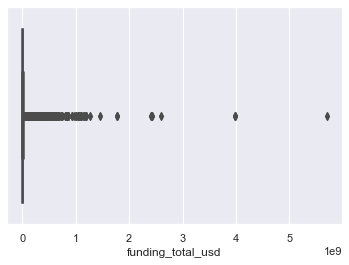

In [24]:
sns.boxplot(drop_dupe['funding_total_usd'])

<AxesSubplot:xlabel='funding_rounds'>

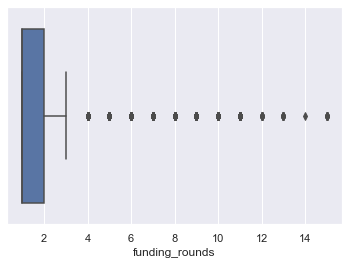

In [25]:
sns.boxplot(drop_dupe['funding_rounds'])

In [26]:
#Type your code here!

### Summary:
If you can see the outlier in both 'funding_total_usd' and 'funding_rounds'. So, let's find them and drop it.

    1. Find the IQR (Interquartile Range)
    2. Find the upper and lower limit
    3. Find outliers
    4. Drop them
    5. Compare the plots after trimming 


#### 2.b.1. Find the IQR

In [27]:
# For funding_total_usd
ft_q1 = drop_dupe['funding_total_usd'].quantile(0.25)
ft_q3 = drop_dupe['funding_total_usd'].quantile(0.75)
iqr_1 = ft_q3-ft_q1

# For funding_rounds
fr_q1 = drop_dupe['funding_rounds'].quantile(0.25)
fr_q3 = drop_dupe['funding_rounds'].quantile(0.75)
iqr_2 = fr_q3-fr_q1

In [28]:
ft_q1, ft_q3, iqr_1

(471700.0, 10220000.0, 9748300.0)

In [29]:
fr_q1, fr_q3, iqr_2

(1.0, 2.0, 1.0)

#### 2.b.1. Find the Upper and Lower limit

In [30]:
# For funding_total_usd
upper_limit_ft = ft_q3 + (1.5 * iqr_1)
lower_limit_ft = ft_q1 - (1.5 * iqr_1)

# # For funding_rounds
upper_limit_fr = fr_q3 + (1.5 * iqr_2)
lower_limit_fr = fr_q1 - (1.5 * iqr_2)

In [31]:
print('upper limit of total fund :', upper_limit_ft)
print('lower limit of total fund :', lower_limit_ft)

upper limit of total fund : 24842450.0
lower limit of total fund : -14150750.0


In [32]:
print('upper limit of fund round :', upper_limit_fr)
print('lower limit of fund round :', lower_limit_fr)

upper limit of fund round : 3.5
lower limit of fund round : -0.5


#### 2.b.1.  Find outliers

In [33]:
# For funding_total_usd(capping)
rem_ot1 = drop_dupe.loc[(drop_dupe['funding_total_usd'] > upper_limit_ft) | (drop_dupe['funding_total_usd']< lower_limit_ft)]
print('old data :', len(drop_dupe))
print('new data :', len(rem_ot1))



old data : 109464
new data : 14524


In [34]:

# For funding_rounds
rem_ot2 = drop_dupe.loc[(drop_dupe['funding_rounds'] > upper_limit_fr) | (drop_dupe['funding_rounds']< lower_limit_fr)]
print('old data :', len(drop_dupe))
print('new data :', len(rem_ot2))

old data : 109464
new data : 8389


#### 2.b.1. Drop the outliers

In [35]:
# For funding_total_usd

rem_ot1 = drop_dupe.copy()
rem_ot1.loc[(rem_ot1['funding_total_usd']>upper_limit_ft), 'funding_total_usd'] = upper_limit_ft
rem_ot1.loc[(rem_ot1['funding_total_usd']<lower_limit_ft), 'funding_total_usd'] = lower_limit_ft
  

<AxesSubplot:xlabel='funding_total_usd'>

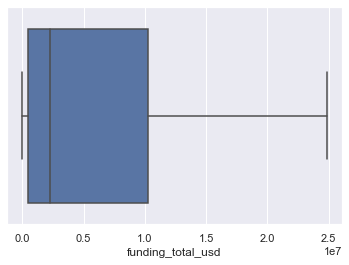

In [36]:
sns.boxplot(rem_ot1['funding_total_usd'])

In [37]:
# For funding_rounds

rem_ot2 = drop_dupe.copy()
rem_ot2.loc[(rem_ot2['funding_rounds']>upper_limit_fr), 'funding_rounds'] = upper_limit_fr
rem_ot2.loc[(rem_ot2['funding_rounds']<lower_limit_fr), 'funding_rounds'] = lower_limit_fr

<AxesSubplot:xlabel='funding_rounds'>

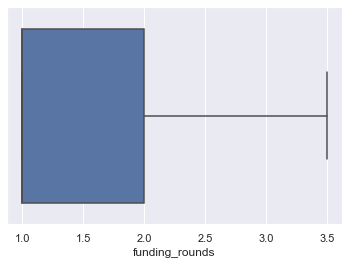

In [38]:
sns.boxplot(rem_ot2['funding_rounds'])

#### 2.c. Delete contradictory (mutually opposed or inconsistent data).


In [39]:
# Since we have not imputed the datasets in closed_at yet, we will check it later on.

# B. Date Transformation
    It can be divided into two successive phases.
   ## 1. Changes in original data
        a. Convert founded_at, closed_at, first_funded_at, last_funding_at, first_milestone_at ,
           last_milestone_at to years.
        b. Generalize the categorical data i.e. category_code, status and category_code.
   ## 2. Create new variables
        a. Create new feature isClosed from closed_at and status.
        b. Create new feature 'active_days'

#### 1.a. Convert founded_at, closed_at, first_funded_at, last_funding_at, first_milestone_at , last_milestone_at to years.

In [40]:
# For founded_at
drop_dupe['founded_at']=pd.to_datetime(drop_dupe['founded_at']).dt.strftime('%Y')

# # closed_at
drop_dupe['closed_at']=pd.to_datetime(drop_dupe['closed_at']).dt.strftime('%Y')
                                       
# # # first_funding_at
drop_dupe['first_funding_at']=pd.to_datetime(drop_dupe['first_funding_at']).dt.strftime('%Y')

# # # last_funding_at
drop_dupe['last_funding_at']=pd.to_datetime(drop_dupe['last_funding_at']).dt.strftime('%Y')


# # # first_milestone_at
drop_dupe['first_milestone_at']=pd.to_datetime(drop_dupe['first_milestone_at']).dt.strftime('%Y')


# # # last_milestone_at
drop_dupe['last_milestone_at']=pd.to_datetime(drop_dupe['last_milestone_at']).dt.strftime('%Y')


drop_dupe

,category_code,status,founded_at,closed_at,country_code,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,milestones,relationships,lat,lng
0,web,operating,2005,2010,USA,2012-12-27,2013-09-24,1.0,2005,2008,3.0,39750000.0,2010,2013,5.0,17.0,47.606209,-122.332071
1,games_video,acquired,2008,2010,USA,2012-12-27,2013-09-24,1.0,2008,2008,1.0,5000000.0,2003,2011,4.0,6.0,34.021122,-118.396467
2,games_video,acquired,2008,2010,USA,2012-12-27,2013-09-24,1.0,2008,2008,1.0,5000000.0,2003,2011,4.0,12.0,37.562992,-122.325525
3,network_hosting,operating,2008,2010,MAR,2012-12-27,2013-09-24,1.0,2008,2008,1.0,5000000.0,2011,2011,1.0,2.0,30.427755,-9.598107
4,games_video,operating,2008,2010,MAR,2012-12-27,2013-09-24,1.0,2008,2008,1.0,5000000.0,2011,2011,1.0,2.0,30.427755,-9.598107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
196548,ecommerce,operating,2007,NaN,USA,NaN,NaN,NaN,2008,2008,1.0,750000.0,2013,2013,2.0,5.0,37.774929,-122.419415
196549,public_relations,operating,2007,NaN,USA,NaN,NaN,NaN,2008,2008,1.0,750000.0,2013,2013,1.0,14.0,37.338208,-121.886329
196550,consulting,operating,1959,NaN,USA,NaN,NaN,NaN,2008,2008,1.0,475000.0,2012,2013,3.0,44.0,38.882334,-77.171091
196551,search,operating,2008,NaN,USA,NaN,NaN,NaN,2008,2008,1.0,475000.0,2006,2008,2.0,1.0,34.052234,-118.243685


 #### 1.b. Generalize the categorical data i.e. category_code and  country_code 

In [41]:
# 1. category_code
drop_dupe['category_code'].nunique()

42

In [42]:
# Since there are 42 categories, one-hot encoding which is going to create a lot of columns so
# Lets Check the repetition of value in ascending order and keep the first 15 values and name 

new_cat=drop_dupe['category_code'].value_counts()

top_cat= new_cat.head(15).index.tolist()

drop_dupe['category_code']=drop_dupe['category_code'].replace({value: 'other' for value in new_cat.index 
                                                     if value not in top_cat})

<AxesSubplot:xlabel='category_code', ylabel='count'>

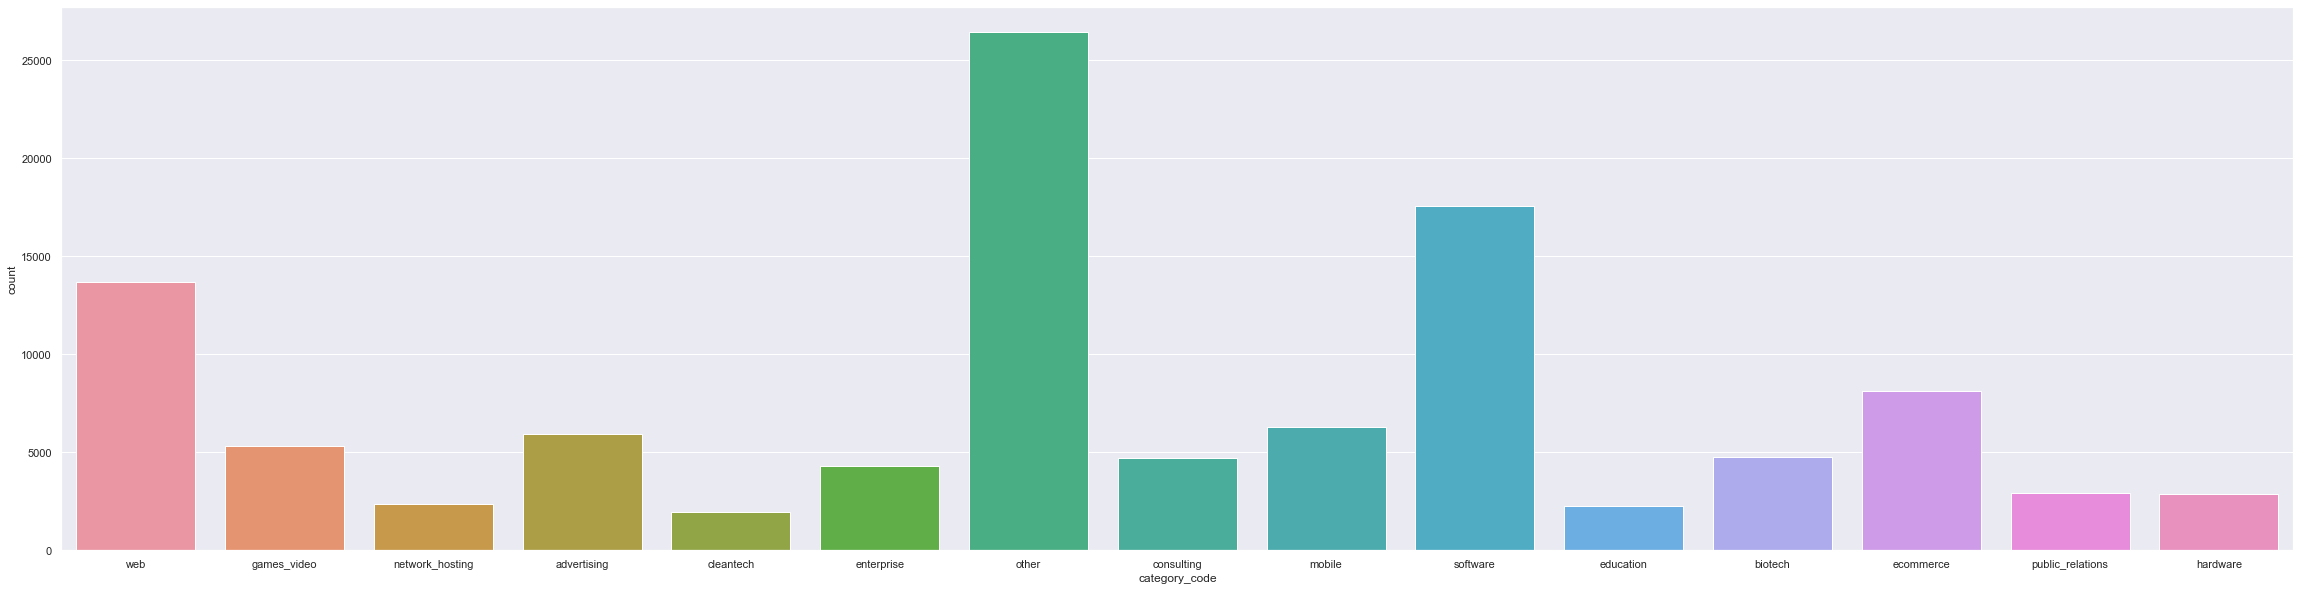

In [43]:
plt.figure(figsize=(40,10))
sns.countplot(data=drop_dupe, x='category_code')

### Let's encode 'country' column now.

In [44]:
# 1. country_code
drop_dupe['country_code'].nunique()

175

In [45]:

# Since there are 161 categories, one-hot encoding which is going to create a lot of columns so
# Lets Check the repetition of value in ascending order and keep the first 10 values and name 
# remaining one as other.

new_cat1=drop_dupe['country_code'].value_counts()

top_cat1= new_cat1.head(10).index.tolist()

drop_dupe['country_code']=drop_dupe['country_code'].replace({value: 'other' for value in new_cat1.index 
                                                     if value not in top_cat1})


<AxesSubplot:xlabel='country_code', ylabel='count'>

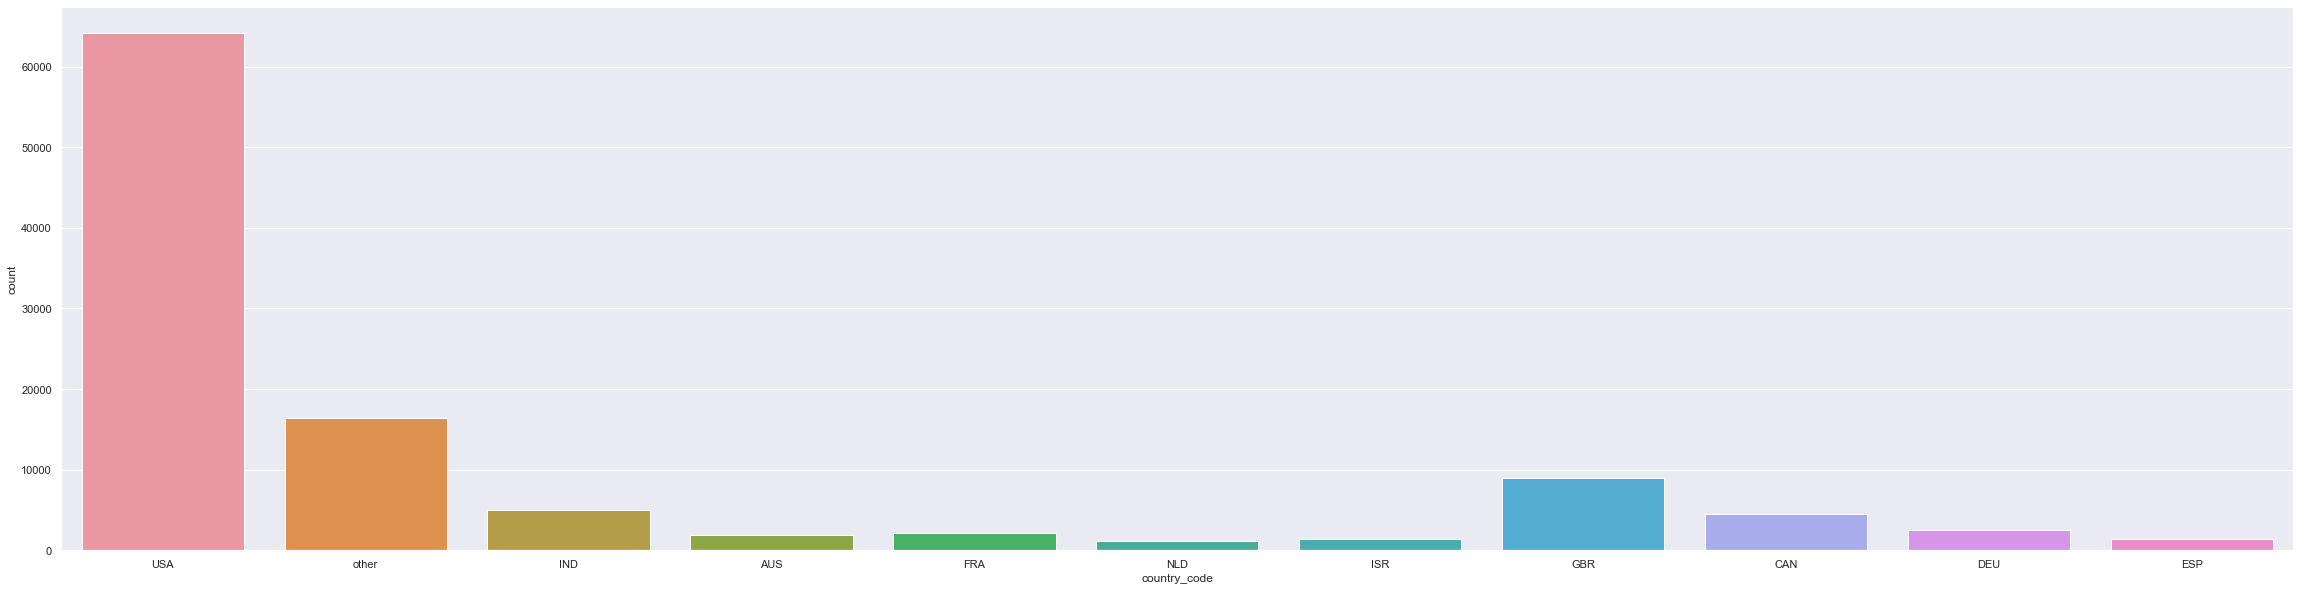

In [46]:
plt.figure(figsize=(40,10))
sns.countplot(data=drop_dupe, x='country_code')

In [47]:
#one hot encoding of nominal variables
onehot_col=['category_code','country_code']
drop_dupe_onehot=pd.get_dummies(drop_dupe[onehot_col])
#adding the one hot encoded columns to the main columns
drop_dupe=pd.concat([drop_dupe,drop_dupe_onehot],axis=1)

In [48]:
# drop these column
drop_dupe=drop_dupe.drop(['category_code','country_code'],axis=1)

drop_dupe.head()

,status,founded_at,closed_at,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,...,country_code_CAN,country_code_DEU,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_ISR,country_code_NLD,country_code_USA,country_code_other
0,operating,2005,2010,2012-12-27,2013-09-24,1.0,2005,2008,3.0,39750000.0,...,0,0,0,0,0,0,0,0,1,0
1,acquired,2008,2010,2012-12-27,2013-09-24,1.0,2008,2008,1.0,5000000.0,...,0,0,0,0,0,0,0,0,1,0
2,acquired,2008,2010,2012-12-27,2013-09-24,1.0,2008,2008,1.0,5000000.0,...,0,0,0,0,0,0,0,0,1,0
3,operating,2008,2010,2012-12-27,2013-09-24,1.0,2008,2008,1.0,5000000.0,...,0,0,0,0,0,0,0,0,0,1
4,operating,2008,2010,2012-12-27,2013-09-24,1.0,2008,2008,1.0,5000000.0,...,0,0,0,0,0,0,0,0,0,1


### 2. Create new variables¶
    a. Create new feature isClosed from closed_at and status.
    b. Create new feature 'active_days'

#### 2.a. Create new feature isClosed from closed_at and status.
     - if the value in status is 'operating' or 'ipo', Let's put 1.
     - Where as if the value is 'acquired' or 'closed', let's put 0.

In [49]:
drop_dupe['status'].unique()

array(['operating', 'acquired', 'closed', 'ipo'], dtype=object)

In [50]:
status_comp=['operating','ipo']

#creating a column for company status, in that open : 1 and closed :0 

drop_dupe['isopen']=drop_dupe['status'].apply(lambda x: 1 if x in status_comp else 0)

drop_dupe['isopen'].value_counts()

1    99511
0     9953
Name: isopen, dtype: int64

In [51]:
drop_dupe.head()

,status,founded_at,closed_at,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,...,country_code_DEU,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_ISR,country_code_NLD,country_code_USA,country_code_other,isopen
0,operating,2005,2010,2012-12-27,2013-09-24,1.0,2005,2008,3.0,39750000.0,...,0,0,0,0,0,0,0,1,0,1
1,acquired,2008,2010,2012-12-27,2013-09-24,1.0,2008,2008,1.0,5000000.0,...,0,0,0,0,0,0,0,1,0,0
2,acquired,2008,2010,2012-12-27,2013-09-24,1.0,2008,2008,1.0,5000000.0,...,0,0,0,0,0,0,0,1,0,0
3,operating,2008,2010,2012-12-27,2013-09-24,1.0,2008,2008,1.0,5000000.0,...,0,0,0,0,0,0,0,0,1,1
4,operating,2008,2010,2012-12-27,2013-09-24,1.0,2008,2008,1.0,5000000.0,...,0,0,0,0,0,0,0,0,1,1


In [52]:
drop_dupe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 109464 entries, 0 to 196552
Data columns (total 43 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   status                          109464 non-null  object 
 1   founded_at                      109464 non-null  object 
 2   closed_at                       109453 non-null  object 
 3   first_investment_at             109431 non-null  object 
 4   last_investment_at              109431 non-null  object 
 5   investment_rounds               109431 non-null  float64
 6   first_funding_at                109464 non-null  object 
 7   last_funding_at                 109464 non-null  object 
 8   funding_rounds                  109464 non-null  float64
 9   funding_total_usd               109464 non-null  float64
 10  first_milestone_at              109464 non-null  object 
 11  last_milestone_at               109464 non-null  object 
 12  milestones      

In [53]:
# to save csv file

drop_dupe.to_csv('companies_preprocessed.csv')

In [54]:
drop_dupe.head()

,status,founded_at,closed_at,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,...,country_code_DEU,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_ISR,country_code_NLD,country_code_USA,country_code_other,isopen
0,operating,2005,2010,2012-12-27,2013-09-24,1.0,2005,2008,3.0,39750000.0,...,0,0,0,0,0,0,0,1,0,1
1,acquired,2008,2010,2012-12-27,2013-09-24,1.0,2008,2008,1.0,5000000.0,...,0,0,0,0,0,0,0,1,0,0
2,acquired,2008,2010,2012-12-27,2013-09-24,1.0,2008,2008,1.0,5000000.0,...,0,0,0,0,0,0,0,1,0,0
3,operating,2008,2010,2012-12-27,2013-09-24,1.0,2008,2008,1.0,5000000.0,...,0,0,0,0,0,0,0,0,1,1
4,operating,2008,2010,2012-12-27,2013-09-24,1.0,2008,2008,1.0,5000000.0,...,0,0,0,0,0,0,0,0,1,1


In [55]:
df_data = pd.read_csv('companies_preprocessed.csv')
df_data.head()

,Unnamed: 0,status,founded_at,closed_at,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,...,country_code_DEU,country_code_ESP,country_code_FRA,country_code_GBR,country_code_IND,country_code_ISR,country_code_NLD,country_code_USA,country_code_other,isopen
0,0,operating,2005,2010.0,2012-12-27,2013-09-24,1.0,2005,2008,3.0,...,0,0,0,0,0,0,0,1,0,1
1,1,acquired,2008,2010.0,2012-12-27,2013-09-24,1.0,2008,2008,1.0,...,0,0,0,0,0,0,0,1,0,0
2,2,acquired,2008,2010.0,2012-12-27,2013-09-24,1.0,2008,2008,1.0,...,0,0,0,0,0,0,0,1,0,0
3,3,operating,2008,2010.0,2012-12-27,2013-09-24,1.0,2008,2008,1.0,...,0,0,0,0,0,0,0,0,1,1
4,4,operating,2008,2010.0,2012-12-27,2013-09-24,1.0,2008,2008,1.0,...,0,0,0,0,0,0,0,0,1,1


In [56]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109464 entries, 0 to 109463
Data columns (total 44 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      109464 non-null  int64  
 1   status                          109464 non-null  object 
 2   founded_at                      109464 non-null  int64  
 3   closed_at                       109453 non-null  float64
 4   first_investment_at             109431 non-null  object 
 5   last_investment_at              109431 non-null  object 
 6   investment_rounds               109431 non-null  float64
 7   first_funding_at                109464 non-null  int64  
 8   last_funding_at                 109464 non-null  int64  
 9   funding_rounds                  109464 non-null  float64
 10  funding_total_usd               109464 non-null  float64
 11  first_milestone_at              109464 non-null  int64  
 12  last_milestone_a

# Exploratory Data Analysis
   - Univariant Analysis

<AxesSubplot:xlabel='status', ylabel='count'>

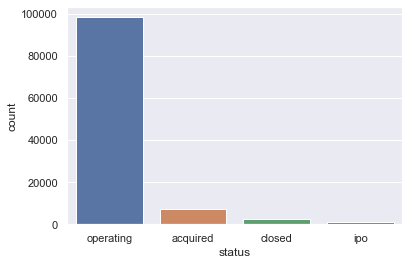

In [57]:
sns.countplot(df_data['status'])

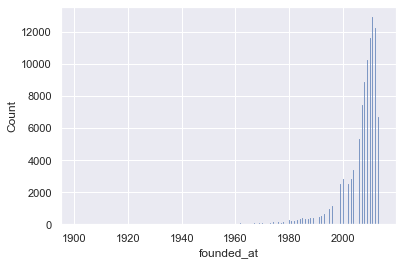

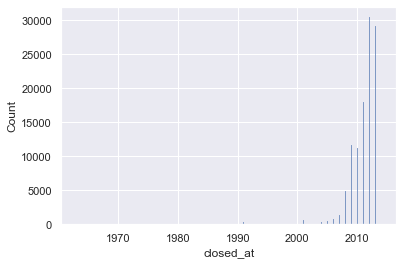

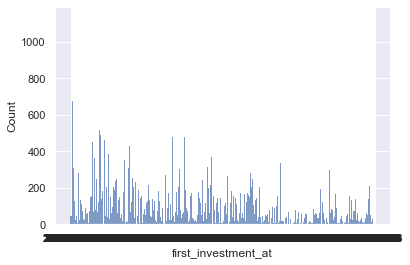

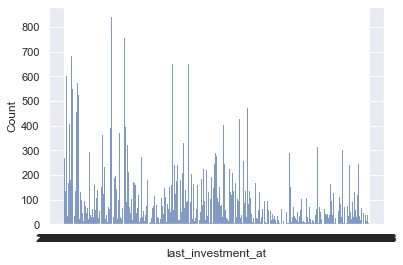

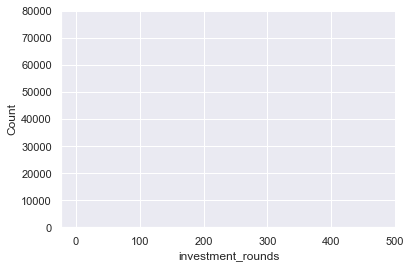

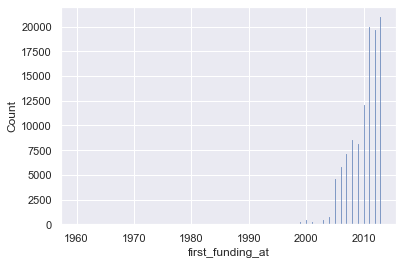

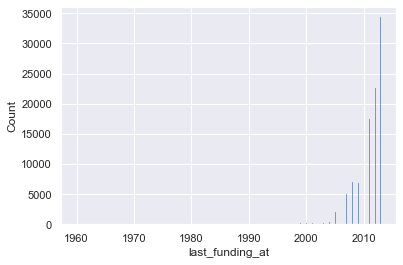

In [58]:
#for all the time related columns we will use histplot
days_col=['founded_at', 'closed_at', 'first_investment_at', 'last_investment_at', 'investment_rounds','first_funding_at',
         'last_funding_at']

for i in days_col:
        plt.figure()
        sns.histplot(data=df_data, x=i)

<AxesSubplot:xlabel='funding_rounds', ylabel='count'>

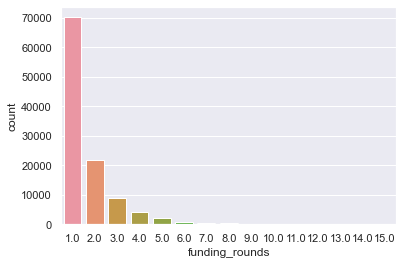

In [59]:
sns.countplot(df_data['funding_rounds'])

####     > As stated before most of the companies funding rounds is 1 round only.

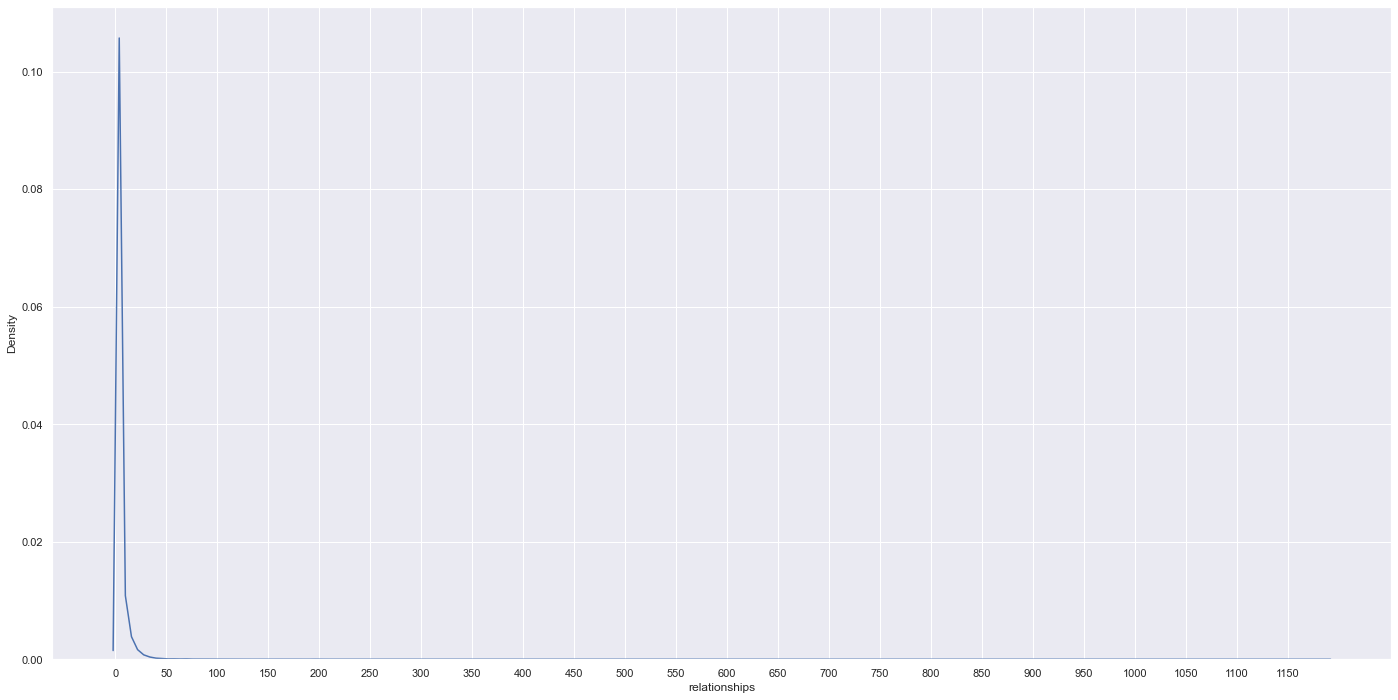

In [60]:
plt.figure(figsize=(24,12))
sns.kdeplot(df_data['relationships'])
plt.xticks(np.arange(0,1200,step=50));

####  > we cab see the distribution shows less then 50

## Bivariant Analysis

<AxesSubplot:>

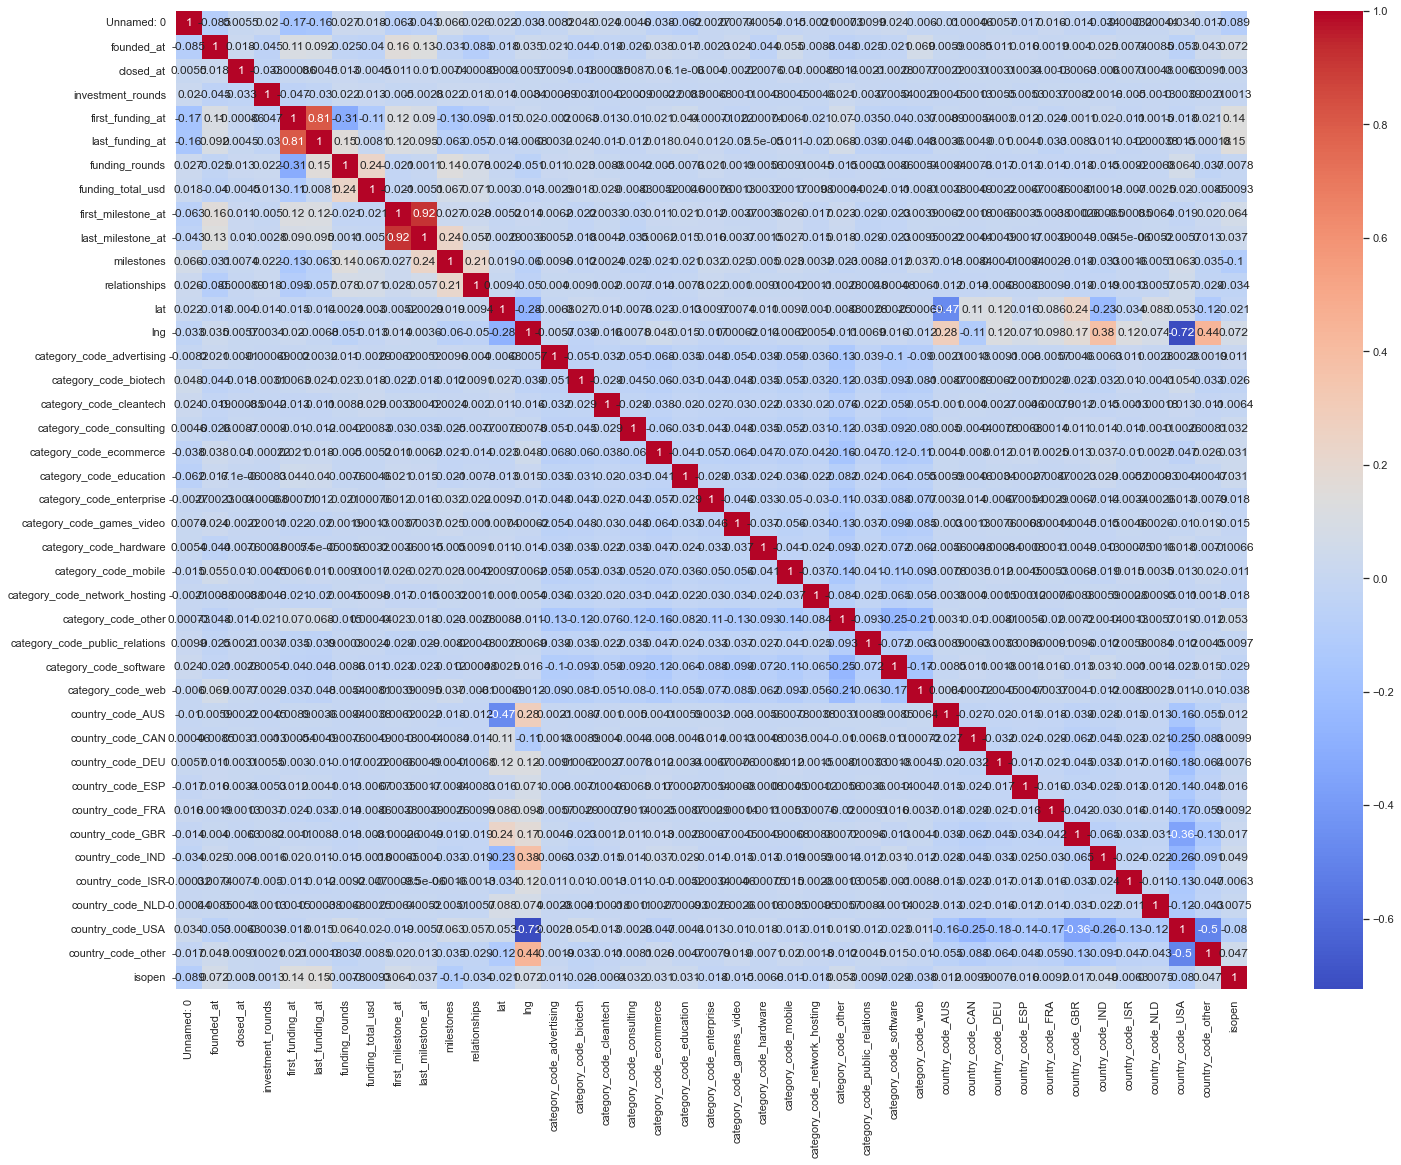

In [61]:
# check corr with heatmap

plt.figure(figsize=(24,18))
corr = df_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')

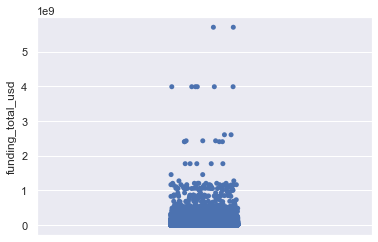

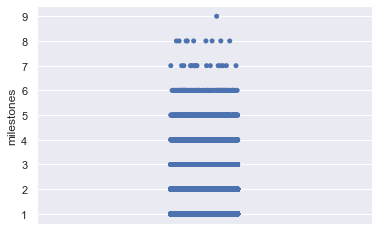

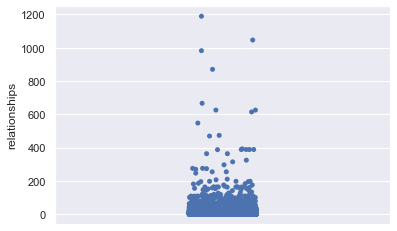

In [62]:
# ckeck relationship status b/w 'status' and other column

new_col = ['funding_total_usd','milestones','relationships']
for i in new_col:
    plt.figure()
    sns.stripplot(data=df_data, y=i , hue='status')

# Feature Engineering

### Feature Creation

In [63]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109464 entries, 0 to 109463
Data columns (total 44 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unnamed: 0                      109464 non-null  int64  
 1   status                          109464 non-null  object 
 2   founded_at                      109464 non-null  int64  
 3   closed_at                       109453 non-null  float64
 4   first_investment_at             109431 non-null  object 
 5   last_investment_at              109431 non-null  object 
 6   investment_rounds               109431 non-null  float64
 7   first_funding_at                109464 non-null  int64  
 8   last_funding_at                 109464 non-null  int64  
 9   funding_rounds                  109464 non-null  float64
 10  funding_total_usd               109464 non-null  float64
 11  first_milestone_at              109464 non-null  int64  
 12  last_milestone_a

In [64]:
# feature creation

df_data['funding_round_stage']= df_data['funding_total_usd']/df_data['funding_rounds']
df_data['first_milestone_day']= df_data['founded_at'] - df_data['first_milestone_at']
df_data['milestones_diff']= df_data['first_milestone_at'] - df_data['last_milestone_at']

df_data.head()

,Unnamed: 0,status,founded_at,closed_at,first_investment_at,last_investment_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,...,country_code_GBR,country_code_IND,country_code_ISR,country_code_NLD,country_code_USA,country_code_other,isopen,funding_round_stage,first_milestone_day,milestones_diff
0,0,operating,2005,2010.0,2012-12-27,2013-09-24,1.0,2005,2008,3.0,...,0,0,0,0,1,0,1,13250000.0,-5,-3
1,1,acquired,2008,2010.0,2012-12-27,2013-09-24,1.0,2008,2008,1.0,...,0,0,0,0,1,0,0,5000000.0,5,-8
2,2,acquired,2008,2010.0,2012-12-27,2013-09-24,1.0,2008,2008,1.0,...,0,0,0,0,1,0,0,5000000.0,5,-8
3,3,operating,2008,2010.0,2012-12-27,2013-09-24,1.0,2008,2008,1.0,...,0,0,0,0,0,1,1,5000000.0,-3,0
4,4,operating,2008,2010.0,2012-12-27,2013-09-24,1.0,2008,2008,1.0,...,0,0,0,0,0,1,1,5000000.0,-3,0


In [65]:
df_data=df_data.drop('Unnamed: 0', axis=1)

In [66]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109464 entries, 0 to 109463
Data columns (total 46 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   status                          109464 non-null  object 
 1   founded_at                      109464 non-null  int64  
 2   closed_at                       109453 non-null  float64
 3   first_investment_at             109431 non-null  object 
 4   last_investment_at              109431 non-null  object 
 5   investment_rounds               109431 non-null  float64
 6   first_funding_at                109464 non-null  int64  
 7   last_funding_at                 109464 non-null  int64  
 8   funding_rounds                  109464 non-null  float64
 9   funding_total_usd               109464 non-null  float64
 10  first_milestone_at              109464 non-null  int64  
 11  last_milestone_at               109464 non-null  int64  
 12  milestones      

In [67]:
df_new = df_data.drop(['first_investment_at','last_investment_at'], axis=1)

In [68]:
df_new.isnull().sum().sum()

44

In [69]:
df_new = df_new.dropna(axis=0)

## Feature Transformation

In [92]:
df_new['funding_total_usd_robust']=(df_new['funding_total_usd']-df_new['funding_total_usd'].median())/(df_new['funding_total_usd'].quantile(0.75)-df_new['funding_total_usd'].quantile(0.25))
df_new.head()

,status,founded_at,closed_at,investment_rounds,first_funding_at,last_funding_at,funding_rounds,funding_total_usd,first_milestone_at,last_milestone_at,...,country_code_IND,country_code_ISR,country_code_NLD,country_code_USA,country_code_other,isopen,funding_round_stage,first_milestone_day,milestones_diff,funding_total_usd_robust
0,operating,2005,2010.0,1.0,2005,2008,3.0,39750000.0,2010,2013,...,0,0,0,1,0,1,13250000.0,-5,-3,3.845444
1,acquired,2008,2010.0,1.0,2008,2008,1.0,5000000.0,2003,2011,...,0,0,0,1,0,0,5000000.0,5,-8,0.284373
2,acquired,2008,2010.0,1.0,2008,2008,1.0,5000000.0,2003,2011,...,0,0,0,1,0,0,5000000.0,5,-8,0.284373
3,operating,2008,2010.0,1.0,2008,2008,1.0,5000000.0,2011,2011,...,0,0,0,0,1,1,5000000.0,-3,0,0.284373
4,operating,2008,2010.0,1.0,2008,2008,1.0,5000000.0,2011,2011,...,0,0,0,0,1,1,5000000.0,-3,0,0.284373


## Feature Selection
we performing feature selection using the mutual information score function with the SelectKBest method to select the top 20 features from the input data X based on their mutual information with the target variable y.

In [70]:
X = df_new.drop('status', axis=1)
y = df_new['status']

In [71]:
X.isnull().sum().sum()

0

In [72]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif
bestfeatures = SelectKBest(score_func=mutual_info_classif, k=13)
bestfeatures=bestfeatures.fit(X,y)

In [73]:
bestfeatures.scores_

array([2.26946652e-02, 3.61959588e-03, 5.36449059e-03, 1.73629390e-02,
       2.02231547e-02, 8.96654116e-03, 1.52023313e-02, 1.11232072e-02,
       6.65659544e-03, 1.79818818e-02, 1.41211807e-02, 1.26162080e-02,
       1.31464599e-02, 9.83037094e-05, 1.71922380e-03, 6.18036417e-05,
       9.74160403e-04, 3.34310278e-04, 6.90319249e-04, 1.14050412e-03,
       0.00000000e+00, 5.09789040e-05, 2.28384500e-04, 7.49293660e-04,
       2.50446887e-03, 8.24759672e-04, 3.14836212e-04, 3.28691138e-03,
       0.00000000e+00, 1.36633796e-03, 0.00000000e+00, 4.18499311e-04,
       0.00000000e+00, 6.78332743e-05, 2.05934351e-03, 0.00000000e+00,
       5.77600202e-04, 1.33861345e-02, 2.49709481e-03, 3.26396832e-01,
       1.36255146e-02, 1.40181143e-02, 6.85249984e-03])

In [74]:
dfscores = pd.DataFrame(bestfeatures.scores_)
dfscores.head()

,0
0,0.022695
1,0.003620
2,0.005364
3,0.017363
4,0.020223


In [80]:
dfcolumns = pd.DataFrame(X.columns)

In [81]:
#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.head()

,0,0
0,founded_at,0.022695
1,closed_at,0.003620
2,investment_rounds,0.005364
3,first_funding_at,0.017363
4,last_funding_at,0.020223


In [82]:
featureScores.columns = ['Features','Score'] #naming the dataframe columns
featureScores.head()

,Features,Score
0,founded_at,0.022695
1,closed_at,0.003620
2,investment_rounds,0.005364
3,first_funding_at,0.017363
4,last_funding_at,0.020223


In [83]:
# arranging the score in decending order the highest at top
featureScores.nlargest(20,'Score')

,Features,Score
39,isopen,0.326397
0,founded_at,0.022695
4,last_funding_at,0.020223
9,milestones,0.017982
3,first_funding_at,0.017363
6,funding_total_usd,0.015202
10,relationships,0.014121
41,first_milestone_day,0.014018
40,funding_round_stage,0.013626
37,country_code_USA,0.013386


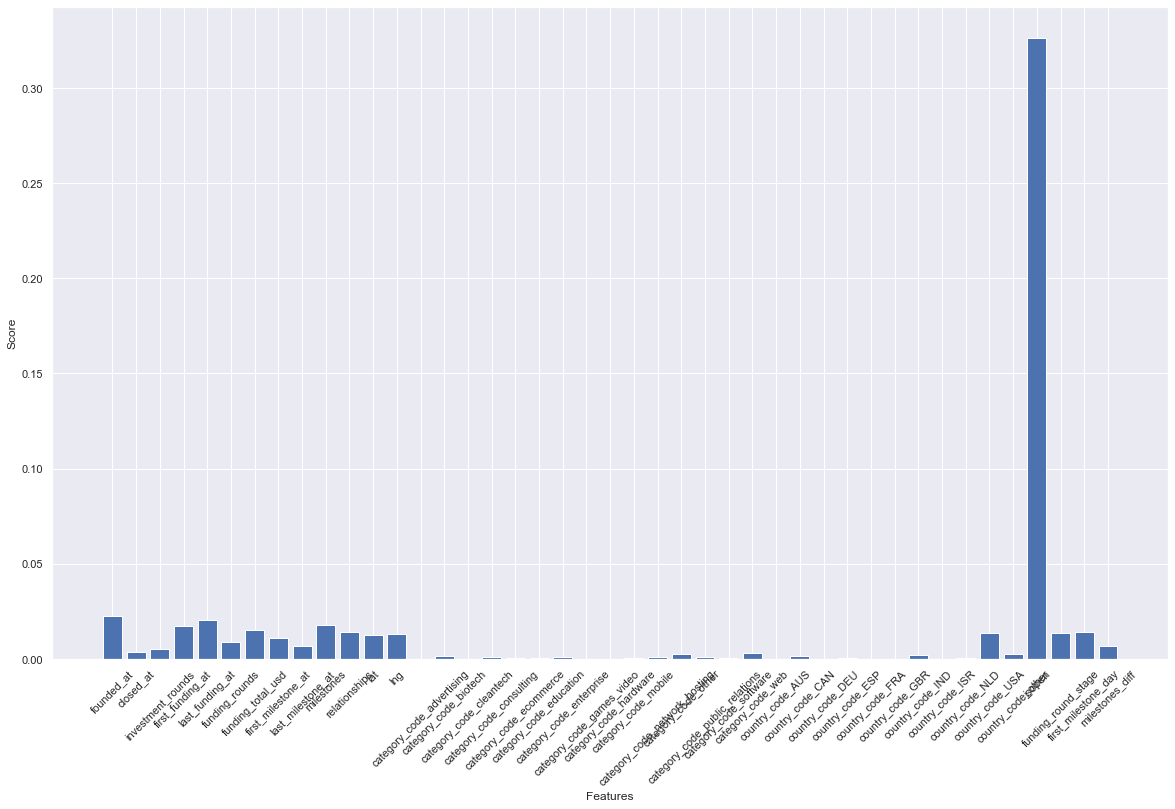

In [91]:
# create a bar plot of feature scores
plt.figure(figsize=(20,12))
plt.bar(range(len(bestfeatures.scores_)), bestfeatures.scores_)
plt.xticks(range(len(X.columns)), X.columns, rotation=45)
plt.xlabel('Features')
plt.ylabel('Score')
plt.show()

In [85]:
from sklearn.ensemble import RandomForestClassifier

In [86]:
RF = RandomForestClassifier()
RF.fit(X, y)
RF.feature_importances_
pd.DataFrame(index=X.columns,data=RF.feature_importances_,columns=["Feature Importance"])

,Feature Importance
founded_at,0.029963
closed_at,0.016708
investment_rounds,0.010414
first_funding_at,0.018538
last_funding_at,0.020637
funding_rounds,0.009410
funding_total_usd,0.031664
first_milestone_at,0.017363
last_milestone_at,0.014770
milestones,0.007891


In [87]:
importances = RF.feature_importances_
print(pd.DataFrame(RF.feature_importances_, columns = ["Imp"], index = X.columns).sort_values(by = 'Imp', ascending = False))

                                     Imp
isopen                          0.626147
funding_round_stage             0.031821
funding_total_usd               0.031664
founded_at                      0.029963
lng                             0.028935
lat                             0.028011
relationships                   0.026557
first_milestone_day             0.024434
last_funding_at                 0.020637
first_funding_at                0.018538
first_milestone_at              0.017363
closed_at                       0.016708
last_milestone_at               0.014770
investment_rounds               0.010414
milestones_diff                 0.009806
funding_rounds                  0.009410
milestones                      0.007891
country_code_USA                0.004288
category_code_web               0.004143
category_code_biotech           0.003980
category_code_other             0.003975
category_code_software          0.003577
category_code_mobile            0.002396
category_code_ha

In [98]:
# to save the file
df_new.to_csv('till_comp_feature_eng.csv')